In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib notebook

In [4]:
%run MgOdos.py

In [5]:
tf = make_fermi(5, 1)

<IPython.core.display.Javascript object>


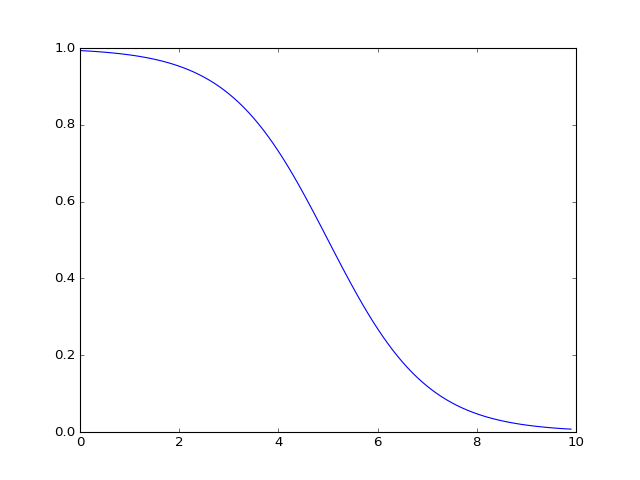

In [6]:
x= np.arange(0, 10, 0.1)
plt.plot(x, tf(x))

In [7]:
cost_function_10 = make_cost_function(10.)

In [8]:
res = minimize(cost_function_10, Ef, tol = 1e-2)

In [9]:
ldos = np.genfromtxt('ldos_Mg.dat')
E, s, p, d, f = ldos.T

<IPython.core.display.Javascript object>


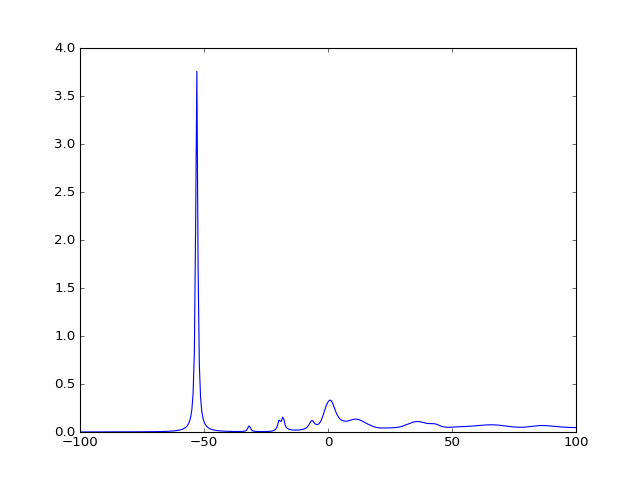

In [11]:
plt.plot(E, p)

<IPython.core.display.Javascript object>


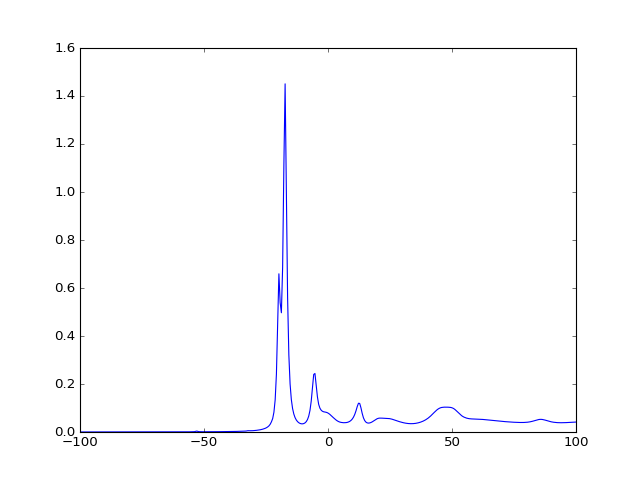

In [12]:
ldos = np.genfromtxt('ldos_O.dat')
E, s, p, d, f = ldos.T
plt.plot(E, p)

### Plot MgO DOS:

<IPython.core.display.Javascript object>


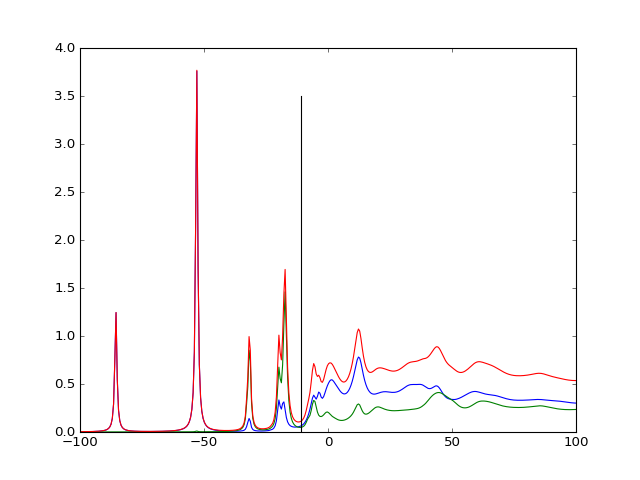

In [13]:
plt.plot(*summed_dos(['ldos_Mg.dat']))
plt.plot(*summed_dos(['ldos_O.dat']))
plt.plot(*summed_dos(['ldos_Mg.dat', 'ldos_O.dat']))
plt.plot([Ef, Ef], [0, 3.5], color = 'k')

<IPython.core.display.Javascript object>


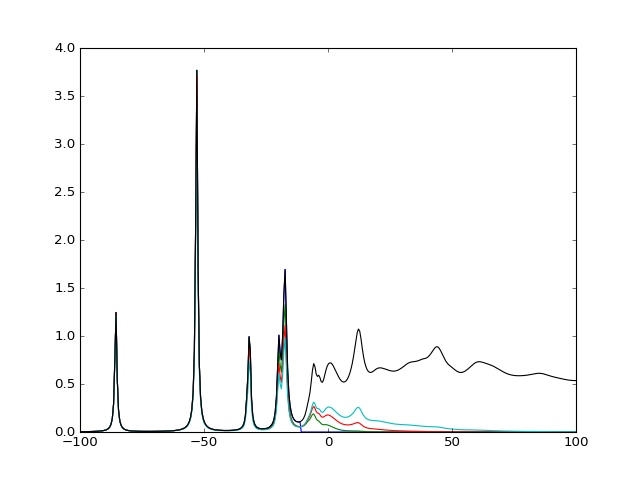

In [14]:
plt.plot(*cb_occupied(E, total_dos, 0), label = '0 eV')
plt.plot(*cb_occupied(E, total_dos, 5), label = '5 eV')
plt.plot(*cb_occupied(E, total_dos, 10), label = '10 eV')
plt.plot(*cb_occupied(E, total_dos, 20), label = '20 eV')
plt.plot(*summed_dos(['ldos_Mg.dat', 'ldos_O.dat']), color = 'k')

### Relative internal energies, in eV:

In [15]:
[cb_energy(E, total_dos, kT) for kT in [0, 5, 10, 20]]

[0.0, 35.38968859736633, 121.51047460934865, 453.5975486090997]

### Conduction band population, in # electrons:

In [16]:
[cb_integrate(E, total_dos, kT) for kT in [0, 5, 10, 20]]

[0.0, 1.5234312500477991, 3.7454973832620437, 8.4241691121751074]

### The above occupied DOSs fail to conserve charge. Repairing this requires shifting the Fermi level as a function of temperature. 

<IPython.core.display.Javascript object>


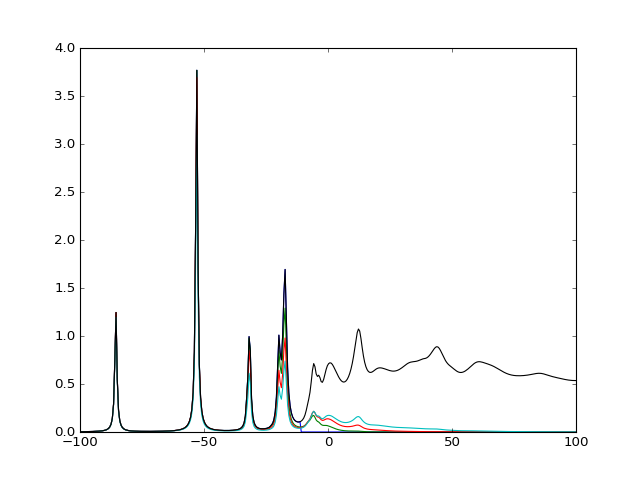

In [17]:
plt.plot(*cb_occupied(E, total_dos, 0, Ef = corrected_Ef(0)), label = '0 eV')
plt.plot(*cb_occupied(E, total_dos, 5, Ef = corrected_Ef(5)), label = '5 eV')
plt.plot(*cb_occupied(E, total_dos, 10, Ef = corrected_Ef(10)), label = '10 eV')
plt.plot(*cb_occupied(E, total_dos, 20, Ef = corrected_Ef(20)), label = '20 eV')
plt.plot(*summed_dos(['ldos_Mg.dat', 'ldos_O.dat']), color = 'k')

### Relative internal energies, in eV:

In [18]:
[cb_energy(E, total_dos, kT, Ef = ef) for kT, ef in zip([0, 5, 10, 20], map(corrected_Ef, [0, 5, 10, 20]))]

[0.0, 39.270465846759862, 129.49561395069009, 237.58146411187795]

### Conduction band population, in # electrons:

In [19]:
[cb_integrate(E, total_dos, kT, Ef = ef) for kT, ef in zip([0, 5, 10, 20], map(corrected_Ef, [0, 5, 10, 20]))]

[0.0, 1.409738186912243, 3.0473765287976007, 7.9536816222885527]

<IPython.core.display.Javascript object>


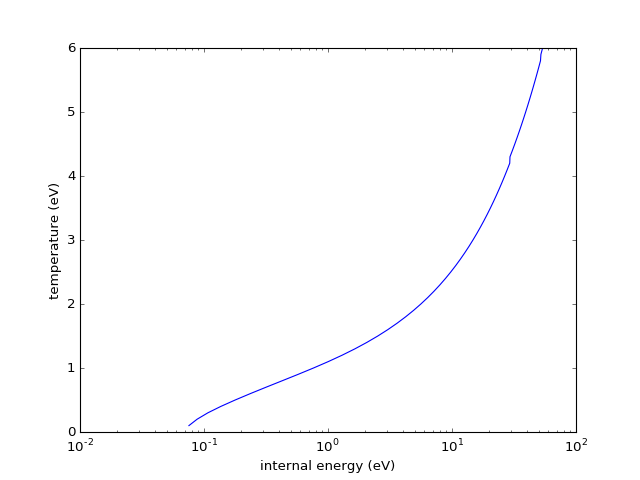

In [20]:
plt.semilogx()
plt.xlabel('internal energy (eV)')
plt.ylabel('temperature (eV)')
plt.plot(energies, T_of_U(energies))